In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [32]:
train=pd.read_csv('train_data.csv')
test=pd.read_csv('test_data.csv')
sample_submission=pd.read_csv('sample_submission.csv')                  

In [33]:
train.head()

,id,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,807,1,0.5,1,0,0,37,0.2,127,...,245,829,2319,5,4,4,0,0,0,1
1,2,1065,1,0.5,0,0,1,14,0.7,89,...,188,928,3078,10,1,18,1,0,1,2
2,3,1171,1,1.7,1,2,0,19,0.3,167,...,248,755,263,6,5,8,0,0,0,0
3,4,609,1,3.0,0,15,1,44,0.3,117,...,58,1253,2581,15,11,15,1,0,1,1
4,5,1193,1,2.3,0,7,0,20,1.0,158,...,1442,1904,1958,7,5,2,1,0,0,2


In [34]:
test.head()

,id,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1401,1572,1,0.8,1,7,1,8,0.8,169,...,8,577,1237,3461,6,3,10,1,1,1
1,1402,707,0,2.1,1,2,0,25,0.8,131,...,17,495,574,3838,9,2,7,1,0,1
2,1403,983,0,0.6,1,0,1,45,0.1,130,...,11,948,1205,2052,5,3,6,1,0,1
3,1404,827,1,0.6,1,9,1,35,0.2,87,...,17,23,826,2367,5,3,15,1,0,1
4,1405,1975,1,1.9,1,2,0,31,0.9,151,...,17,775,1607,3022,13,5,19,0,0,1


In [35]:
print(train.shape,test.shape)

(1400, 22) (600, 21)


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 22 columns):
id               1400 non-null int64
battery_power    1400 non-null int64
bluetooth        1400 non-null int64
clock_speed      1400 non-null float64
dual_sim         1400 non-null int64
fc               1400 non-null int64
four_g           1400 non-null int64
int_memory       1400 non-null int64
m_dep            1400 non-null float64
mobile_wt        1400 non-null int64
n_cores          1400 non-null int64
pc               1400 non-null int64
px_height        1400 non-null int64
px_width         1400 non-null int64
ram              1400 non-null int64
sc_h             1400 non-null int64
sc_w             1400 non-null int64
talk_time        1400 non-null int64
three_g          1400 non-null int64
touch_screen     1400 non-null int64
wifi             1400 non-null int64
price_range      1400 non-null int64
dtypes: float64(2), int64(20)
memory usage: 240.7 KB


In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 21 columns):
id               600 non-null int64
battery_power    600 non-null int64
bluetooth        600 non-null int64
clock_speed      600 non-null float64
dual_sim         600 non-null int64
fc               600 non-null int64
four_g           600 non-null int64
int_memory       600 non-null int64
m_dep            600 non-null float64
mobile_wt        600 non-null int64
n_cores          600 non-null int64
pc               600 non-null int64
px_height        600 non-null int64
px_width         600 non-null int64
ram              600 non-null int64
sc_h             600 non-null int64
sc_w             600 non-null int64
talk_time        600 non-null int64
three_g          600 non-null int64
touch_screen     600 non-null int64
wifi             600 non-null int64
dtypes: float64(2), int64(19)
memory usage: 98.5 KB


In [38]:
test.isnull().sum()

id               0
battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [39]:
train.isnull().sum()

id               0
battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [40]:
for i in train.columns:
    print(i,train[i].corr(train['price_range'],method='pearson'))

id 0.07432494058846037
battery_power 0.1997747259135161
bluetooth 0.007027649386073807
clock_speed -0.02360882122046089
dual_sim 0.03322375116521112
fc 0.006689574155728109
four_g -0.014062231166131221
int_memory 0.045099923747952714
m_dep 0.0046262891627179906
mobile_wt -0.036183364244882055
n_cores 0.0056063168320817595
pc 0.031326982585783036
px_height 0.1429683338245217
px_width 0.1622366872771674
ram 0.9181278691092608
sc_h 0.04393644471378211
sc_w 0.050385909862064635
talk_time 0.0038602938155114655
three_g -0.01116300417934133
touch_screen -0.05558367912407936
wifi 0.023645406915703715
price_range 1.0


In [41]:
train.loc[train['price_range']== 3.0].head()

,id,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
12,13,1370,0,1.4,0,5,1,6,0.2,158,...,1392,1783,3703,13,10,11,1,1,0,3
18,19,1461,0,2.4,1,3,1,40,0.5,141,...,1265,1298,3799,16,1,4,1,0,0,3
21,22,1709,1,2.1,0,1,0,13,1.0,156,...,974,1385,3283,17,1,15,1,0,0,3
25,26,1809,0,0.5,0,6,0,23,0.7,123,...,433,1661,2784,12,6,20,1,1,1,3
28,29,911,0,1.4,1,3,0,14,0.7,199,...,1563,1692,2933,16,3,11,0,1,0,3


In [42]:
train.corr(method='pearson')

,id,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
id,1.000000,-0.017888,0.039517,-0.007143,0.042364,-0.023668,0.026765,0.005055,-0.030100,-0.015375,...,-0.055966,-0.022062,0.085181,-0.049846,0.005038,-0.012680,0.019161,0.027277,-0.021613,0.074325
battery_power,-0.017888,1.000000,-0.009722,0.013782,-0.038118,0.028987,0.013888,0.017102,0.035654,0.010051,...,-0.009281,-0.012174,0.002308,-0.021093,-0.014305,0.053070,0.001044,-0.011932,0.002977,0.199775
bluetooth,0.039517,-0.009722,1.000000,0.048849,0.015732,-0.006819,-0.004243,0.026852,-0.014753,-0.012159,...,-0.010394,-0.026192,0.021981,0.001132,0.006462,0.008109,-0.042413,0.020011,-0.008539,0.007028
clock_speed,-0.007143,0.013782,0.048849,1.000000,0.016023,-0.015817,-0.018427,0.001168,-0.001278,0.015822,...,-0.007240,-0.009153,-0.018537,-0.041655,-0.003870,-0.000545,-0.036774,0.047538,-0.015943,-0.023609
dual_sim,0.042364,-0.038118,0.015732,0.016023,1.000000,-0.014529,0.005358,-0.002839,-0.012519,-0.004204,...,0.001877,0.035297,0.054281,-0.005962,-0.025245,-0.025067,-0.021806,0.012777,0.024017,0.033224
fc,-0.023668,0.028987,-0.006819,-0.015817,-0.014529,1.000000,-0.024292,-0.032420,-0.014980,0.009810,...,0.005093,0.002306,0.003369,-0.016715,0.017254,-0.003747,0.006780,-0.015656,0.023149,0.006690
four_g,0.026765,0.013888,-0.004243,-0.018427,0.005358,-0.024292,1.000000,0.021652,-0.046392,-0.003872,...,-0.006616,0.004212,-0.027073,0.036611,0.033876,-0.057975,0.585576,0.021215,-0.030788,-0.014062
int_memory,0.005055,0.017102,0.026852,0.001168,-0.002839,-0.032420,0.021652,1.000000,0.003740,-0.064406,...,-0.022913,-0.027686,0.031367,0.037378,0.003192,-0.008424,0.001022,-0.012379,-0.001295,0.045100
m_dep,-0.030100,0.035654,-0.014753,-0.001278,-0.012519,-0.014980,-0.046392,0.003740,1.000000,0.023530,...,0.036436,0.031457,-0.010590,-0.018608,-0.017211,0.014483,-0.038137,-0.005053,-0.032952,0.004626
mobile_wt,-0.015375,0.010051,-0.012159,0.015822,-0.004204,0.009810,-0.003872,-0.064406,0.023530,1.000000,...,0.021290,-0.001010,-0.004049,-0.018891,-0.029113,-0.026996,0.010162,-0.014373,-0.002674,-0.036183


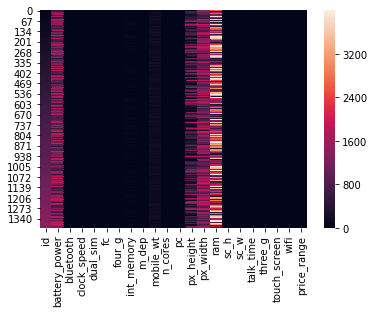

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(train)
plt.show()

In [44]:
y_train=train['price_range']
x_train=train.drop(columns=['price_range','id'])

In [45]:
x_train

,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,807,1,0.5,1,0,0,37,0.2,127,4,0,245,829,2319,5,4,4,0,0,0
1,1065,1,0.5,0,0,1,14,0.7,89,2,2,188,928,3078,10,1,18,1,0,1
2,1171,1,1.7,1,2,0,19,0.3,167,7,19,248,755,263,6,5,8,0,0,0
3,609,1,3.0,0,15,1,44,0.3,117,1,16,58,1253,2581,15,11,15,1,0,1
4,1193,1,2.3,0,7,0,20,1.0,158,7,13,1442,1904,1958,7,5,2,1,0,0
5,1417,1,2.7,0,2,1,56,0.9,114,6,4,494,1649,590,11,3,6,1,0,1
6,1456,1,0.5,1,7,0,7,0.4,105,5,12,823,1104,1587,6,5,20,1,0,1
7,1742,1,1.6,0,3,0,49,0.8,100,1,9,1134,1469,1947,5,4,6,1,0,1
8,675,0,2.3,0,10,0,60,0.9,144,5,15,192,757,1735,7,0,13,1,0,1
9,642,1,0.5,0,0,1,38,0.8,86,5,10,887,1775,435,9,2,2,1,1,0


In [46]:
y_train.value_counts()


3    350
2    350
1    350
0    350
Name: price_range, dtype: int64

In [47]:
x_test=test.drop(columns=['id'])
x_test.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [48]:
# Normalizing data convergence. This brings all the values under
# one range without any distortion.
from sklearn.preprocessing import StandardScaler as ss
x_train=ss().fit_transform(x_train)
x_test=ss().fit_transform(x_test)

In [49]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score as cvs
lr = LogisticRegression().fit(x_train, y_train)
loges_pred = lr.predict(x_test)
scores_logistic=cvs(LogisticRegression(),x_train,y_train,cv=3)
print(scores_logistic)
print(scores_logistic.mean())

[0.79700855 0.85042735 0.81896552]
0.8221338048924256


In [50]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import cross_val_score as cvs
rand_for=rfc().fit(x_train,y_train)
rf_pred=rand_for.predict(x_test)
scores_randF=cvs(rfc(),x_train,y_train,cv=3)
print(scores_randF)
print(scores_randF.mean())

[0.75854701 0.75       0.71982759]
0.7427915315846351


In [51]:
# Support Vector Machines
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score as cvs
svm=SVC()
svm=svm.fit(x_train,y_train)
svm_pred=svm.predict(x_test)
scores_svm=cvs(SVC(),x_train,y_train,cv=3)
print(scores_svm)
print(scores_svm.mean())

[0.85470085 0.84401709 0.85560345]
0.8514404656646036


In [52]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score as cvs
 
knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
scores_knn=cvs(knn,x_train,y_train,cv=3)
print(scores_knn)
print(scores_knn.mean())

[0.47649573 0.42735043 0.45258621]
0.45214412024756845


In [53]:
res_logi=pd.DataFrame({'id':test['id'],'price_range':loges_pred})
res_logi.to_csv('C:/Users/JKSEKAR/Desktop/mobile price/result_logesticReg.csv',index=False)


In [54]:
res_RF=pd.DataFrame({'id':test['id'],'price_range':rf_pred})
res_RF.to_csv('C:/Users/JKSEKAR/Desktop/mobile price/result_ranfor.csv',index=False)

In [55]:
res_svm=pd.DataFrame({'id':test['id'],'price_range':svm_pred})
res_svm.to_csv('C:/Users/JKSEKAR/Desktop/mobile price/result_svm.csv',index=False)

In [56]:
res_knn=pd.DataFrame({'id':test['id'],'price_range':knn_pred})
res_knn.to_csv('C:/Users/JKSEKAR/Desktop/mobile price/result_knn.csv',index=False)

In [30]:
df = pd.read_csv('C:/Users/JKSEKAR/Desktop/mobile price/result_logesticReg.csv')
df

,id,price_range
0,1401,3
1,1402,3
2,1403,2
3,1404,2
4,1405,3
5,1406,3
6,1407,0
7,1408,0
8,1409,1
9,1410,3
